In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Step 2: Load Data
data = pd.read_csv("datasets/milk_quality_data.csv") 

In [4]:
# Step 3: Feature Scaling (Normalization)
scaler = MinMaxScaler()
data[['pH', 'Temperature', 'Density', 'Colour']] = scaler.fit_transform(data[['pH', 'Temperature', 'Density', 'Colour']])

In [5]:
# Step 4: Split Data into Train & Test
X = data[['pH', 'Temperature', 'Density', 'Colour']]
y = data['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 5: Train XGBoost Model
xgb_model = XGBClassifier(objective="multi:softmax", num_class=3, eval_metric="mlogloss", random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3, ...)

In [7]:
# Step 6: Make Predictions
y_pred = xgb_model.predict(X_test)

In [8]:
# Step 7: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.83


In [9]:
# Step 7: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       645
           1       0.87      0.60      0.71       692
           2       0.68      0.90      0.78       663

    accuracy                           0.83      2000
   macro avg       0.85      0.83      0.83      2000
weighted avg       0.85      0.83      0.83      2000



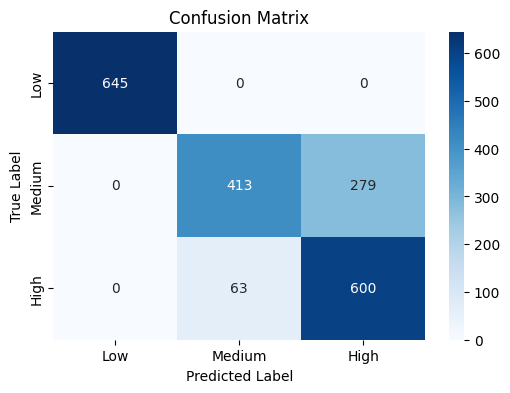

In [10]:
# Step 8: Visualizing Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [11]:
# Step 9: Save the trained model to a .pkl file
model_path = "models/xgb_model.pkl"
joblib.dump(xgb_model, model_path)

print(f"Model saved to {model_path}")

Model saved to models/xgb_model.pkl


<h1>Testing Prediction of XGBoost</h1>

In [16]:
# Load the trained XGBoost model
model_path = "models/xgb_model.pkl"  # Update the path if necessary
xgb_model = joblib.load(model_path)

# Load the Predict.csv file
input_csv_path = "datasets/prediction.csv"  # Update the path if necessary
data = pd.read_csv(input_csv_path)

# Ensure the columns are in the correct order
expected_features = ['pH', 'Temperature', 'Density', 'Colour']
data = data[expected_features]

# Normalize the input data (if required)
mean = np.array([6.5, 40, 1.03, 250])  # Replace with actual mean values
scale = np.array([1.0, 10, 0.01, 50])  # Replace with actual scale values
data_scaled = (data - mean) / scale

# Make predictions
predictions = xgb_model.predict(data_scaled)

# Add predictions to the DataFrame
data['Predicted_Grade'] = predictions

# Print the predictions in a readable format
print("Predictions:")
print(data)

Predictions:
    pH  Temperature  Density  Colour  Predicted_Grade
0  6.7           40     1.03     250                1
1  5.9           50     1.02     255                0
2  8.2           55     1.02     247                0
3  6.5           38     1.03     249                1
4  6.3           36     1.03     243                1
5  6.6           35     1.02     255                1


<h2>Featuring Data on XGBoost</h2>

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(XGBClassifier(objective="multi:softmax", num_class=3, eval_metric="mlogloss"),
                           param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


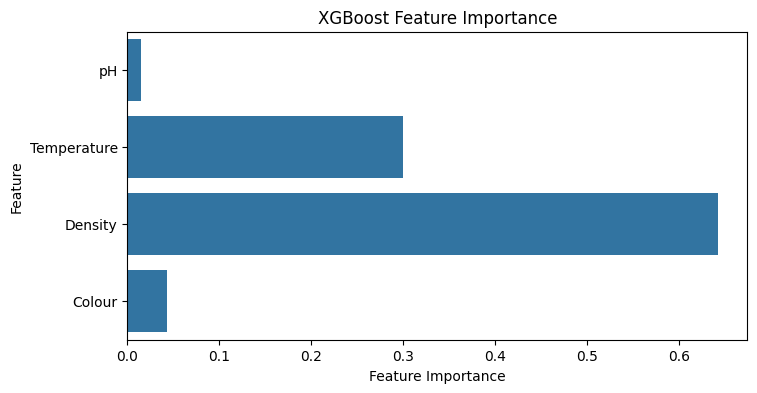

In [19]:
importances = xgb_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.show()

<h2>LightGBM</h2>

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[672]	valid_0's multi_logloss: 0.304383

🔹 LightGBM Model Accuracy: 0.85

🔹 LightGBM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       672
           1       0.98      0.56      0.72       669
           2       0.69      0.99      0.81       659

    accuracy                           0.85      2000
  

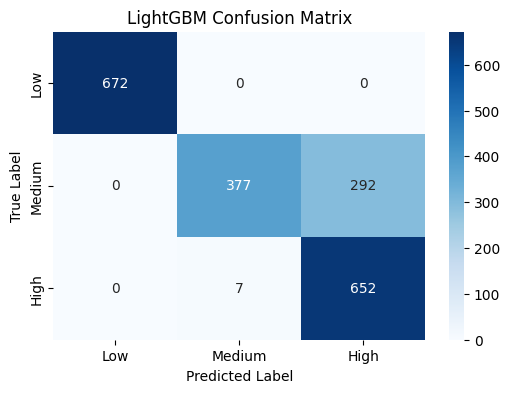

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Sta

In [6]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import lightgbm as lgb
from lightgbm import early_stopping

# Step 2: Load Data
data = pd.read_csv("/Users/darshan/Documents/Projects/Capstone/datasets/milk_quality_data.csv")

# Step 3: Feature Engineering
## No Feature Interactions (as requested) 
## Optional: Add meaningful transformations like log or polynomial features if needed

# Step 4: Feature Scaling (Normalization)
scaler = MinMaxScaler()
data[['pH', 'Temperature', 'Density', 'Colour']] = scaler.fit_transform(data[['pH', 'Temperature', 'Density', 'Colour']])

# Step 5: Split Data into Train & Test
X = data[['pH', 'Temperature', 'Density', 'Colour']]
y = data['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Handle Class Imbalance
# Using class_weight='balanced' in LightGBM instead of oversampling/undersampling

# Step 7: Train LightGBM Model with Hyperparameter Tuning
lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=3,
    metric='multi_logloss',
    learning_rate=0.01,  # Lower learning rate for stable learning
    n_estimators=1000,   # More trees for better learning
    max_depth=10,        # Prevent overfitting
    num_leaves=31,       # Control tree complexity
    class_weight='balanced',  # Adjust for class imbalance
    subsample=0.8,       # Prevent overfitting
    colsample_bytree=0.8,# Use only 80% of features per tree
    random_state=42
)

# Train Model
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='multi_logloss',
    callbacks=[early_stopping(stopping_rounds=50, verbose=True)]
)

# Step 8: Make Predictions
y_pred_lgb = lgb_model.predict(X_test)

# Step 9: Evaluate Model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"\n🔹 LightGBM Model Accuracy: {accuracy_lgb:.2f}")

# Classification Report
print("\n🔹 LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))

# Step 10: Visualizing Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, cmap="Blues", fmt="d",
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LightGBM Confusion Matrix")
plt.show()

# Step 11: Cross-Validation for Model Robustness
cv_scores = cross_val_score(lgb_model, X, y, cv=5, scoring='accuracy')
print(f"\n🔹 Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

<h2>Feature Importance on LightGBM</h2>

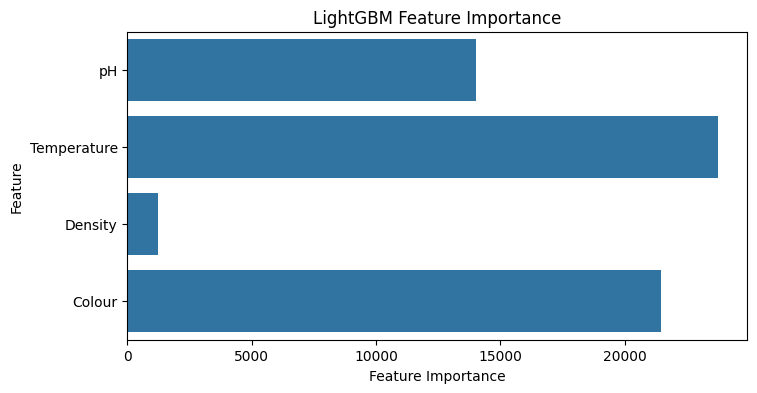

In [10]:
importances = lgb_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("LightGBM Feature Importance")
plt.show()

<h2>Testing Prediction of LightGBM</h2>

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the test dataset
test_data_path = "/Users/darshan/Documents/Projects/Capstone/datasets/prediction.csv"  # Update the path if necessary
test_data = pd.read_csv(test_data_path)

# Ensure the test dataset has the required features
expected_features = ['pH', 'Temperature', 'Density', 'Colour']
test_data = test_data[expected_features]

# Normalize the test data using the same scaler used during training
scaler = MinMaxScaler()
test_data_scaled = scaler.fit_transform(test_data)  # Use fit_transform if scaler is not saved

# Convert scaled data back to a DataFrame for readability
test_data_scaled = pd.DataFrame(test_data_scaled, columns=expected_features)

# Make predictions
predictions = lgb_model.predict(test_data_scaled)

# Add predictions to the test dataset
test_data['Predicted_Grade'] = predictions

# Print the predictions
print("Test Predictions:")
print(test_data)

# Save the predictions to a CSV file
output_csv_path = "Test_Predicted_Output.csv"  # Update the path if necessary
test_data.to_csv(output_csv_path, index=False)

print(f"\nPredictions saved to {output_csv_path}")

Test Predictions:
    pH  Temperature  Density  Colour  Predicted_Grade
0  6.7           40     1.03     250                2
1  5.9           50     1.02     255                0
2  8.2           55     1.02     247                0
3  6.5           38     1.03     249                2
4  6.3           36     1.03     243                1
5  6.6           35     1.02     255                1

Predictions saved to Test_Predicted_Output.csv


<h2>CatBoost</h2>

Treating 'Colour' as a categorical feature with one-hot encoding.
Best Parameters from Grid Search: {'depth': 6, 'l2_leaf_reg': 3, 'learning_rate': 0.01}
0:	learn: 0.7097352	test: 0.7828126	best: 0.7828126 (0)	total: 2.77ms	remaining: 5.55s
100:	learn: 0.7791812	test: 0.8578666	best: 0.8578666 (25)	total: 228ms	remaining: 4.29s
200:	learn: 0.7830215	test: 0.8588048	best: 0.8592739 (186)	total: 487ms	remaining: 4.36s
300:	learn: 0.7942224	test: 0.8592739	best: 0.8592739 (186)	total: 760ms	remaining: 4.29s
400:	learn: 0.8158776	test: 0.8592739	best: 0.8592739 (186)	total: 1.04s	remaining: 4.15s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.8592738552
bestIteration = 186

Shrink model to first 187 iterations.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       672
           1       1.00      0.55      0.71       669
           2       0.69      1.00      0.82       659

    accuracy       

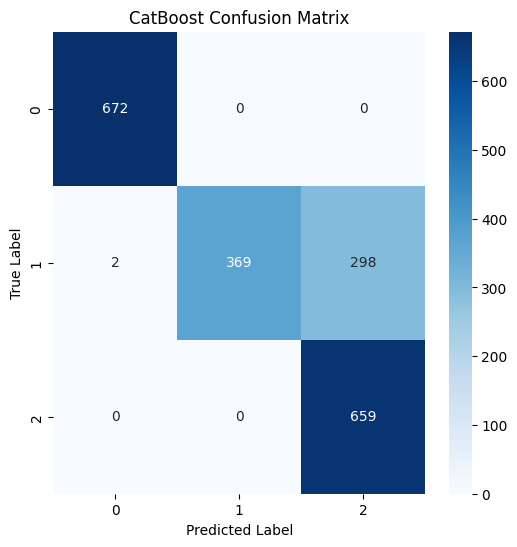


Feature Importance:
        Feature  Importance
1   Temperature   70.667099
2       Density   10.422563
0            pH    7.013847
3    Colour_240    2.620767
7    Colour_244    2.573675
5    Colour_242    2.373835
6    Colour_243    2.231965
4    Colour_241    1.953027
15   Colour_252    0.067911
13   Colour_250    0.017104
9    Colour_246    0.014146
14   Colour_251    0.013270
12   Colour_249    0.010639
17   Colour_254    0.005498
16   Colour_253    0.004791
10   Colour_247    0.003600
11   Colour_248    0.003336
18   Colour_255    0.002926
8    Colour_245    0.000000
0:	learn: 0.7758936	total: 1.84ms	remaining: 3.69s
100:	learn: 0.8577493	total: 189ms	remaining: 3.56s
200:	learn: 0.8575148	total: 403ms	remaining: 3.6s
300:	learn: 0.8579839	total: 612ms	remaining: 3.45s
400:	learn: 0.8581011	total: 821ms	remaining: 3.27s
500:	learn: 0.8583357	total: 1.03s	remaining: 3.09s
600:	learn: 0.8583357	total: 1.24s	remaining: 2.89s
700:	learn: 0.8583357	total: 1.45s	remaining: 2.69s
800:	

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN

# Load dataset for training
df = pd.read_csv("/Users/darshan/Documents/Projects/Capstone/datasets/milk_quality_data.csv")

# Ensure the dataset contains required features
required_features = ['pH', 'Temperature', 'Density', 'Colour', 'Grade']
df = df[required_features]

# Treat Colour as a categorical feature and use one-hot encoding to increase its importance
df['Colour'] = df['Colour'].astype(str)
print("Treating 'Colour' as a categorical feature with one-hot encoding.")
X = pd.get_dummies(df.drop(columns=['Grade']), columns=['Colour'], prefix='Colour')
y = df["Grade"]

# Feature scaling for numerical features
scaler = StandardScaler()
numerical_features = ['pH', 'Temperature', 'Density']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance with ADASYN (increased oversampling ratio)
try:
    adasyn = ADASYN(sampling_strategy={1: int(0.3 * len(y_train[y_train == 1]) + len(y_train[y_train == 1]))}, random_state=42)
    X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
except ValueError as e:
    print(f"ADASYN failed with error: {e}. Proceeding without oversampling.")
    X_train_resampled, y_train_resampled = X_train, y_train

# Identify categorical features (Colour columns after one-hot encoding)
cat_features = [i for i, col in enumerate(X_train_resampled.columns) if col.startswith('Colour')]

# Grid Search for Hyperparameter Tuning
param_grid = {
    'learning_rate': [0.01, 0.03, 0.05],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}
catboost_model = CatBoostClassifier(
    iterations=2000,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    cat_features=cat_features,
    class_weights={0: 1.0, 1: 1.0, 2: 1.2},  # Slightly prioritize class 2 to balance predictions
    verbose=0
)
grid = GridSearchCV(catboost_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_resampled, y_train_resampled)

# Use the best parameters
best_params = grid.best_params_
print("Best Parameters from Grid Search:", best_params)

# Initialize CatBoost Model with the best parameters
cb_model = CatBoostClassifier(
    iterations=2000,
    learning_rate=best_params['learning_rate'],
    depth=best_params['depth'],
    l2_leaf_reg=best_params['l2_leaf_reg'],
    loss_function='MultiClass',
    eval_metric='Accuracy',
    cat_features=cat_features,
    class_weights={0: 1.0, 1: 1.0, 2: 1.2},
    verbose=100
)

# Train the model with early stopping
cb_model.fit(X_train_resampled, y_train_resampled, eval_set=(X_test, y_test), early_stopping_rounds=300, use_best_model=True)

# Predictions on test set
y_pred = cb_model.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cb_model.classes_, yticklabels=cb_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CatBoost Confusion Matrix")
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': cb_model.get_feature_importance()
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(cb_model, X, y, cv=skf, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", scores)
print("Mean Cross-Validation Accuracy:", scores.mean())

# Save the trained model
cb_model.save_model("/Users/darshan/Documents/Projects/Capstone/models/catboost_milk_quality_optimized_v8.cbm")
print("Model saved successfully!")

<h2>Testing Prediction of CatBoost</h2>

In [5]:
# Load the test data from a CSV file
test_df = pd.read_csv("/Users/darshan/Documents/Projects/Capstone/datasets/prediction.csv")

# Ensure the test data contains the required features
required_test_features = ['pH', 'Temperature', 'Density', 'Colour']
if not all(col in test_df.columns for col in required_test_features):
    raise ValueError(f"Test data must contain the following features: {required_test_features}")

# Treat Colour as a categorical feature and apply one-hot encoding
test_df['Colour'] = test_df['Colour'].astype(str)
test_X = pd.get_dummies(test_df, columns=['Colour'], prefix='Colour')

# Ensure test_X has the same columns as X (from training)
# Add missing columns with zeros and reorder to match X
for col in X.columns:
    if col not in test_X.columns:
        test_X[col] = 0
test_X = test_X[X.columns]

# Feature scaling for numerical features (using the same scaler from training)
test_X[numerical_features] = scaler.transform(test_X[numerical_features])

# Make predictions using the trained model
test_predictions = cb_model.predict(test_X)

# Add predictions to the test DataFrame
test_df['Predicted_Grade'] = test_predictions

# Display the test data with predictions
print("\nTest Data with Predictions:")
print(test_df)



Test Data with Predictions:
    pH  Temperature  Density Colour  Predicted_Grade
0  6.7           40     1.03    250                2
1  5.9           50     1.02    255                0
2  8.2           55     1.02    247                0
3  6.5           38     1.03    249                2
4  6.3           36     1.03    243                1
5  6.6           35     1.02    255                2
